# Chapter 2: Basic Probability

In [12]:
using Pkg

Pkg.add("Combinatorics")

   Resolving package versions...
   Installed Combinatorics ─ v1.0.3
    Updating `~/.julia/environments/v1.11/Project.toml`
  [861a8166] + Combinatorics v1.0.3
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [861a8166] + Combinatorics v1.0.3
Precompiling project...
   1882.5 ms  ✓ Combinatorics
  1 dependency successfully precompiled in 3 seconds. 372 already precompiled.


## Random Experiments

In [3]:
#Even Sum Two Dice

N, faces = 10^6, 1:6

numSol = sum([iseven(i + j) for i in faces, j in faces])/ length(faces)^2
mcEst = sum([iseven(rand(faces)+ rand(faces)) for i in 1:N])/N

println("Numerical solution = $numSol \nMonte Carlo estimate = $mcEst")

Numerical solution = 0.5 
Monte Carlo estimate = 0.500005


## Partially Matching Passwords

In [8]:
using Random
Random.seed!()

passLength, numMatchesForLog = 8,1
possibleChars = [ 'a':'z'; 'A':'Z' ; '0':'9']

correctPassword = "3xyZu4vN"

numMatch(loginPassword) = 
    sum([loginPassword[i] == correctPassword[i] for i in 1:passLength])

N = 10^7

passwords = [String(rand(possibleChars,passLength)) for _ in 1:N]
numLogs = sum([numMatch(p) >= numMatchesForLog for p in passwords])
println("Number of login attempts logged: ", numLogs)
println("Proportion of login attempts logged: ", numLogs/N)

Number of login attempts logged: 1221658
Proportion of login attempts logged: 0.1221658


## Birthday Paradox: 

Maximum error: 2.461172365062727820892938546467205715971256384764337390231064159958270652057059e-16


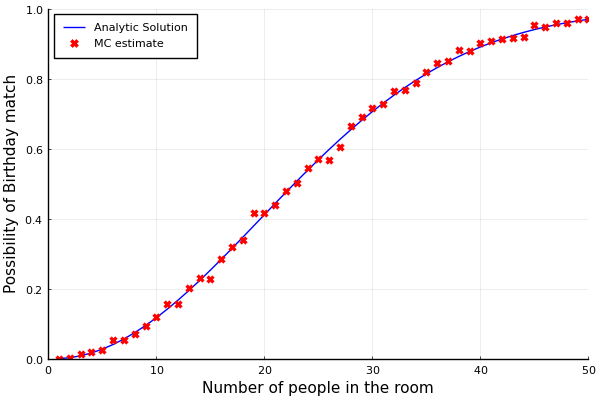

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [17]:
using StatsBase, Combinatorics, Plots ; pyplot()

matchExists1(n) = 1 - prod([k/365 for k in 365:-1:365-n+1])
matchExists2(n) = 1 - factorial(365,365-big(n))/365^big(n)

function bdEvent(n)
    birthdays = rand(1:365,n)
    dayCounts = counts(birthdays, 1:365)
    return maximum(dayCounts) > 1
end

probEst(n) = sum([bdEvent(n) for _ in 1:N])/N

xGrid = 1:50
analyticSolution1 = [matchExists1(n) for n in xGrid]
analyticSolution2 = [matchExists2(n) for n in xGrid]

println("Maximum error: $(maximum(abs.(analyticSolution1 - analyticSolution2)))")

N = 10^3
mcEstimates = [probEst(n) for n in xGrid]

plot(xGrid, analyticSolution1, c=:blue, label="Analytic Solution")
scatter!(xGrid,mcEstimates, c=:red, ms=6, msw=0, shape=:xcross,
    label = "MC estimate", xlims=(0,50), ylims=(0,1),
    xlabel = "Number of people in the room",
    ylabel = "Possibility of Birthday match",
    legend=:topleft)


 